# Mathematics in Machine Learning Thesis 

### Delleani Mattia (s288854)

## Import library

In [ ]:
#Import useful library

import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN, SMOTE

#Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

SEED = 42

In [ ]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# Import Dataset
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 1 - Data overview & Description


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Many categorical attributes are encoded as integer or float. We need to change their types

In [ ]:
# select Categorical columns
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region',
                       'TrafficType', 'VisitorType', 'Weekend']# , 'Revenue'# convert the target in binary {0,1}
df.Revenue[df.Revenue == True] = 1
df[categorical_columns] = df[categorical_columns].astype('category') # set types to category

numerical_columns = [x for x in df.columns if x not in categorical_columns]

In [ ]:
# Unique values per column
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

## 2 - Data Exploration
### 2.1 - Missing values

In [ ]:
nullValues = df.isnull().values.any()
print(f"The dataset contains null or missing values? {nullValues}")

The dataset contains null or missing values? False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

### 3.2 - Data distributions

#### 3.2.1 - 3.2.2 - Categorical features distributions

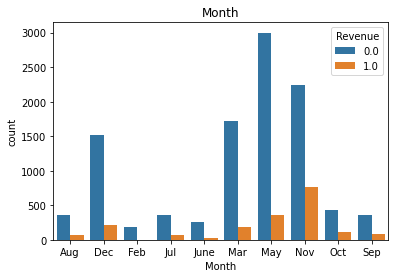

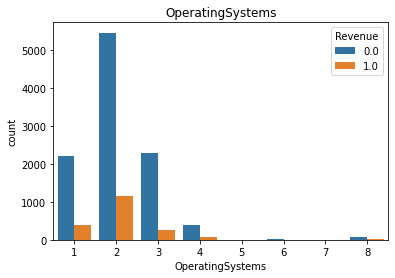

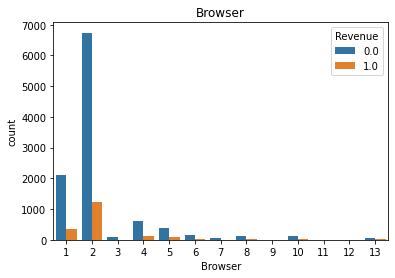

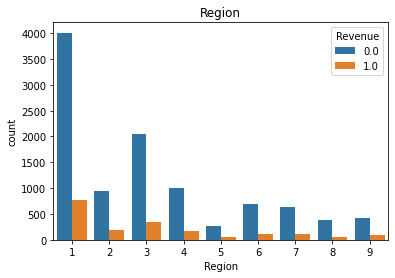

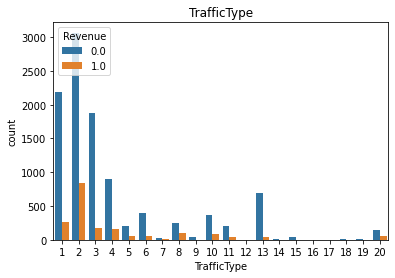

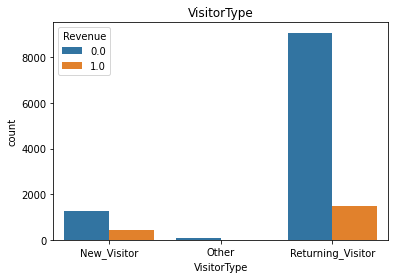

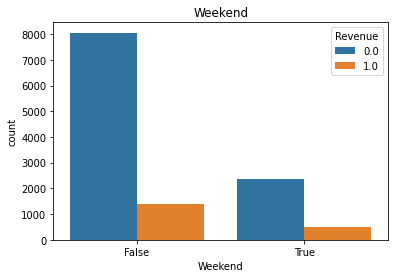

In [ ]:
c = 0
for col in categorical_columns:
    sns.countplot(x = col, hue="Revenue", data = df)
    plt.title(f"{categorical_columns[c]}")
    c += 1
    plt.show()

#### 3.3.3 - Numerical features distributions

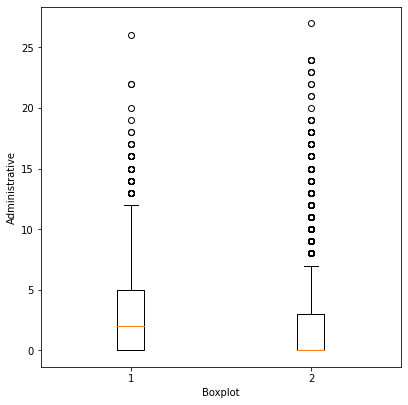

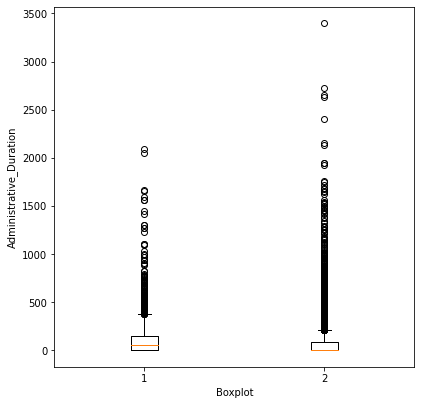

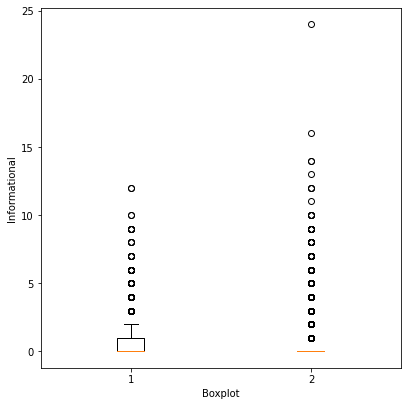

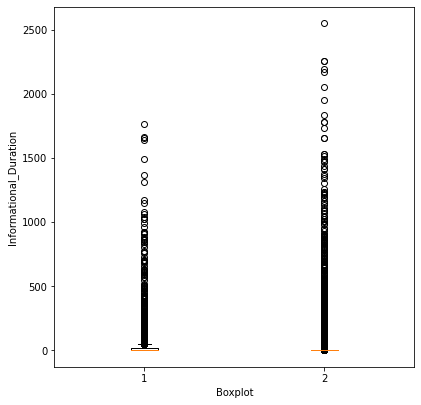

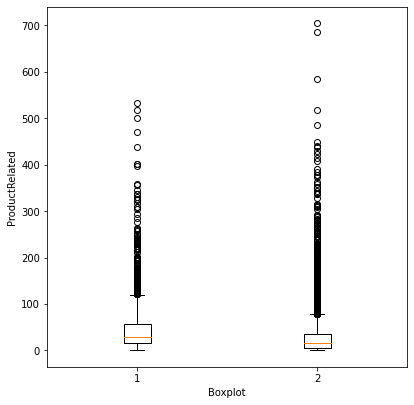

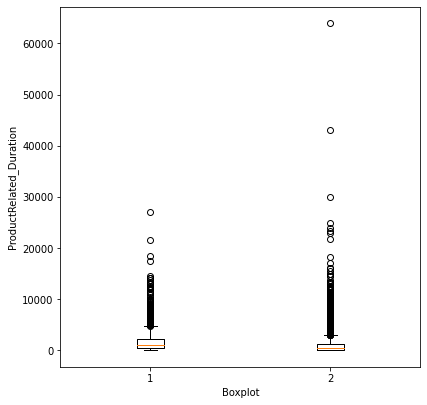

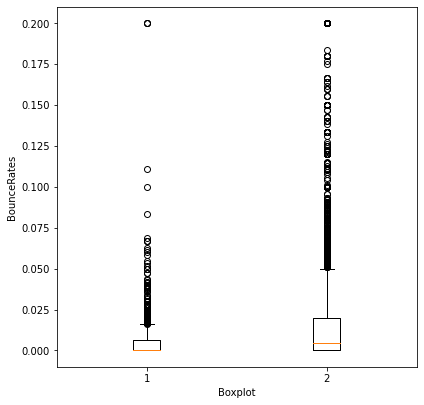

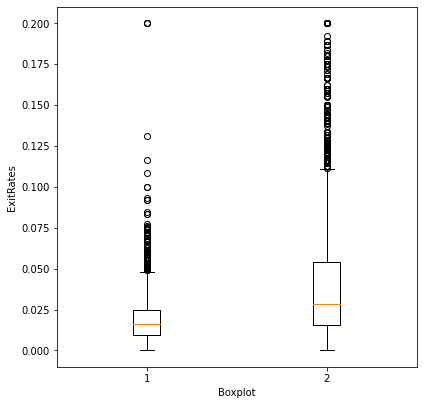

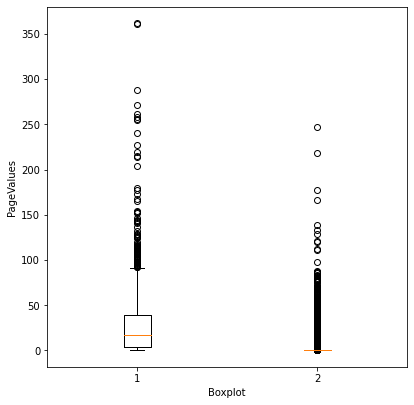

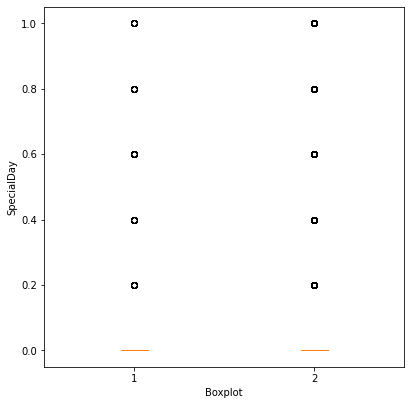

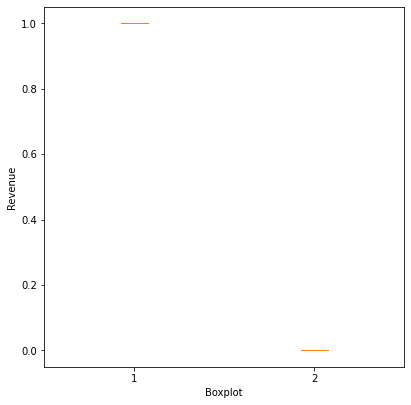

In [ ]:
for col in numerical_columns:
  
    data_1 = df[df['Revenue'] == 1]
    data_2 = df[df['Revenue'] == 0]
    
    data = [data_1[col], data_2[col]]
 
    fig = plt.figure(figsize =(5, 5))
    
 
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
 
    # Creating plot
    bp = ax.boxplot(data)
    
    plt.ylabel(col)
    plt.xlabel('Boxplot')
    # show plot
    plt.show()

### 3.3 - Correlations

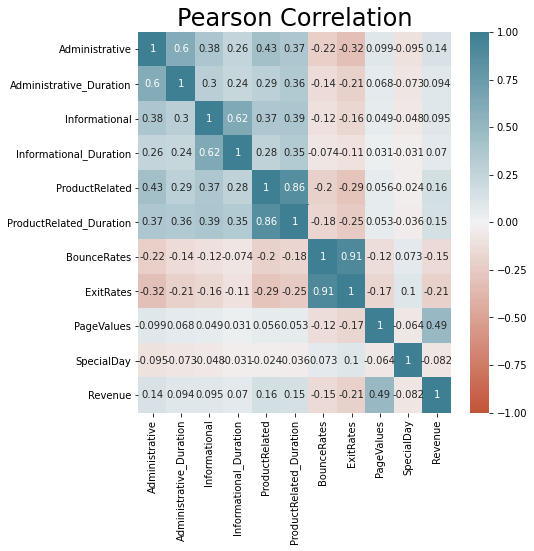

In [ ]:
# Pearson Correlation
df_numerical = df[numerical_columns].copy()
df_numerical = (df_numerical-df_numerical.mean())/df_numerical.std()
corr = df_numerical.corr() 
plt.figure(figsize = (7,7))
sns.heatmap(corr, annot = True, 
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 200))
plt.title('Pearson Correlation', fontsize = 24)
plt.savefig('CorrelationMap.jpg')

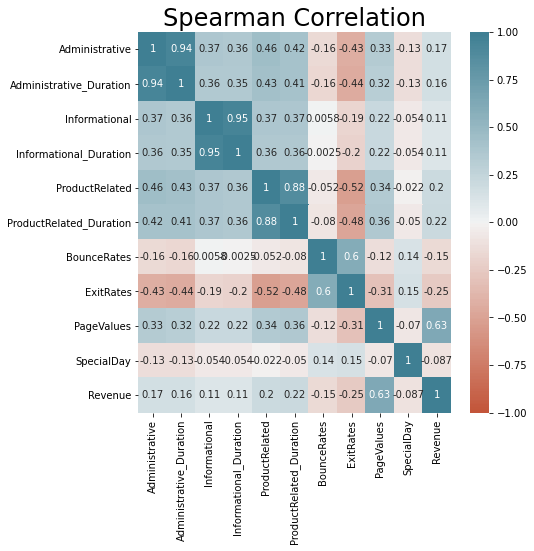

In [ ]:
# Spearman correlation
df_numerical = df[numerical_columns].copy()
df_numerical = (df_numerical-df_numerical.mean())/df_numerical.std()
corr = df_numerical.corr(method='spearman') #
plt.figure(figsize = (7,7))
sns.heatmap(corr, annot = True, 
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 200))
plt.title('Spearman Correlation', fontsize = 24)
plt.savefig('CorrelationMap.jpg')

Useful plots

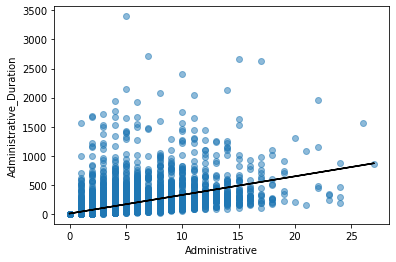

In [ ]:
x = df['Administrative']
y = df['Administrative_Duration']
plt.scatter(x, y, alpha=0.5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.xlabel('Administrative')
plt.ylabel('Administrative_Duration')
plt.show()

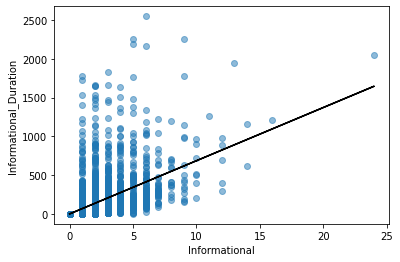

In [ ]:
x = df['Informational']
y = df['Informational_Duration']
plt.scatter(x, y, alpha=0.5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.xlabel('Informational')
plt.ylabel('Informational_Duration')
plt.show()

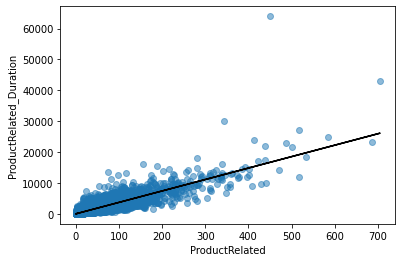

In [ ]:
x = df['ProductRelated']
y = df['ProductRelated_Duration']
plt.scatter(x, y, alpha=0.5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated_Duration')
plt.show()

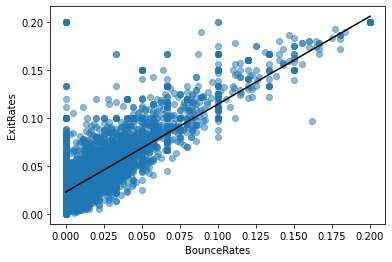

In [ ]:
x = df['BounceRates']
y = df['ExitRates']
plt.scatter(x, y, alpha=0.5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.show()

## 4 - Data Preprocessing
### 4.1- Outliers management & Correlated features

In [ ]:
df2 = df.copy()
y_2 = df2['Revenue']
df2.drop(columns = ['ProductRelated_Duration', 'BounceRates','Administrative_Duration', 'Informational_Duration', 'Revenue' ], axis = 1, inplace= True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Administrative    12330 non-null  int64   
 1   Informational     12330 non-null  int64   
 2   ProductRelated    12330 non-null  int64   
 3   ExitRates         12330 non-null  float64 
 4   PageValues        12330 non-null  float64 
 5   SpecialDay        12330 non-null  float64 
 6   Month             12330 non-null  category
 7   OperatingSystems  12330 non-null  category
 8   Browser           12330 non-null  category
 9   Region            12330 non-null  category
 10  TrafficType       12330 non-null  category
 11  VisitorType       12330 non-null  category
 12  Weekend           12330 non-null  category
dtypes: category(7), float64(3), int64(3)
memory usage: 665.2 KB


##### Outliers Management

In [ ]:
df2.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend'],
      dtype='object')

In [ ]:
numerical_columns =['Administrative', 'Informational', 'ProductRelated','ExitRates', 'PageValues', 'SpecialDay']
data = df2.copy()[numerical_columns]
data.shape

(12330, 6)

##### Z-score

In [ ]:
#find absolute value of z-score for each observation

z = np.abs(stats.zscore(data))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean_zscore = data[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean_zscore.shape

(10339, 6)

In [ ]:
data_clean_zscore.describe()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay
count,10339.000000,10339.000000,10339.00000,10339.000000,10339.000000,10339.000000
mean,2.140342,0.373827,27.82271,0.033990,4.119746,0.030158
std,2.797156,0.869073,28.74736,0.030174,10.807806,0.119292
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8.00000,0.013878,0.000000,0.000000
50%,1.000000,0.000000,18.00000,0.025000,0.000000,0.000000
75%,4.000000,0.000000,36.00000,0.043160,0.000000,0.000000
max,12.000000,4.000000,165.00000,0.186667,61.581712,0.600000


##### IQR

In [ ]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean_IQR = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean_IQR.shape

(5934, 6)

In [ ]:
df_categorical = df[categorical_columns].copy()
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Month             12330 non-null  category
 1   OperatingSystems  12330 non-null  category
 2   Browser           12330 non-null  category
 3   Region            12330 non-null  category
 4   TrafficType       12330 non-null  category
 5   VisitorType       12330 non-null  category
 6   Weekend           12330 non-null  category
dtypes: category(7)
memory usage: 87.3 KB


Too many records will be lost if we use z-score or IQR. Better to proceed with an ad-hoc approach

### Ad-hoc approach
Remove some outliers

In [ ]:
data.shape

(12330, 6)

In [ ]:
data = data[ data['ProductRelated'] < 500]
data.shape

(12323, 6)

In [ ]:
data = data[data["Administrative"] < 22]
data.shape

(12311, 6)

In [ ]:
data = data[data["Informational"] < 15]
data.shape

(12310, 6)

Build dataframe without outliers

In [ ]:
df_clean = data.join(df_categorical)
df_clean = df_clean.join(y_2)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12310 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Administrative    12310 non-null  int64   
 1   Informational     12310 non-null  int64   
 2   ProductRelated    12310 non-null  int64   
 3   ExitRates         12310 non-null  float64 
 4   PageValues        12310 non-null  float64 
 5   SpecialDay        12310 non-null  float64 
 6   Month             12310 non-null  category
 7   OperatingSystems  12310 non-null  category
 8   Browser           12310 non-null  category
 9   Region            12310 non-null  category
 10  TrafficType       12310 non-null  category
 11  VisitorType       12310 non-null  category
 12  Weekend           12310 non-null  category
 13  Revenue           12310 non-null  float64 
dtypes: category(7), float64(4), int64(3)
memory usage: 1.1 MB


In [ ]:
df = df_clean.copy()

df.shape

(12310, 14)

### 4.2 - One hot encoding

In [ ]:
df_ohe = pd.get_dummies(df, categorical_columns)
Y = df_ohe['Revenue'].copy()
df_ohe.drop(['Revenue'],axis=1, inplace=True)
df_ohe.shape

(12310, 71)

### 4.3 - Standardization

In [ ]:
#STANDARDSCALER
n=StandardScaler()

scaled_df = n.fit_transform(df_ohe)

### 4.4 - Principal Component Analysis (PCA)

0.9065394171037786 expressed by 50 components


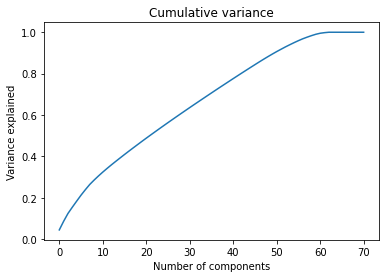

In [ ]:
# PCA
PCA_df = PCA(random_state = SEED).fit(scaled_df)
pca_df = PCA_df.transform( scaled_df)

cumvar = np.cumsum(PCA_df.explained_variance_ratio_)

n_comp =  np.argmax(cumvar > .9)
#Plotting cumulative variance
plt.plot(cumvar)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
print(f"{cumvar[n_comp]} expressed by {n_comp} components")

In [ ]:
df_ohe.shape

(12310, 71)

In [ ]:
# construct new dataset with 90% of variance explained.
X_pca = np.dot(scaled_df, PCA_df.components_[:n_comp,:].T)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])
X_pca.shape

(12310, 50)

### 4.5 - Feature Selection

In [ ]:
kbest = SelectKBest(f_classif)
Xfs = df_ohe.copy()
Xfs_train, Xfs_test, yfs_train, yfs_test = train_test_split(Xfs, Y, test_size=0.3, stratify = Y)

## 5 - Train, validation and test set


In [ ]:
# First we split the dataset in: 70% training and 30% test set
# then the training set is splitted in: 75% in training and 25% in validation
X, X_test, y, y_test = train_test_split(X_pca, Y, test_size=0.3, stratify = Y)
X_val, X_train, y_val, y_train = train_test_split(X, y, test_size=0.75, stratify = y)

The dataset is unbalanced

In [ ]:
df['Revenue'].value_counts()

0.0    10408
1.0     1902
Name: Revenue, dtype: int64

### 5.3 - Oversampling

In [ ]:
X_ADASYN, y_ADASYN = ADASYN().fit_resample(X_train, y_train)
print("ADASYN generate a dataset of ", X_ADASYN.shape, "records, while the original dataset have ", X_train.shape, " records")
print( 'The new dataset has' , np.count_nonzero(y_ADASYN == 0), 'elements as Revenue=True, and', np.count_nonzero(y_ADASYN == 1), 'elements Revenue=False')

ADASYN generate a dataset of  (10904, 50) records, while the original dataset have  (6463, 50)  records
The new dataset has 5465 elements as Revenue=True, and 5439 elements Revenue=False


In [ ]:
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X_train, y_train)
print("SMOTE generate a dataset of ", X_SMOTE.shape, "records, while the original dataset have ", X_train.shape, " records")
print( 'The new dataset has' , np.count_nonzero(y_SMOTE == 0), 'elements as Revenue=True, and', np.count_nonzero(y_SMOTE == 1), 'elements Revenue=False')

SMOTE generate a dataset of  (10930, 50) records, while the original dataset have  (6463, 50)  records
The new dataset has 5465 elements as Revenue=True, and 5465 elements Revenue=False


## 7 - Classification Algorithms

In [ ]:
binary_metricsPCA = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])
binary_metricsFS = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])
binary_metricsORIGINAL = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])

### 7.1 - Classification with PCA 

In [ ]:
# Methods and hyperparamters 
PCAparams = {
    
    'LR' : {'solver' : ['newton-cg', 'lbfgs', 'liblinear'] },
    'SVM' : {'C' : np.logspace(0, 4, 5) },
    'KNN' : {'n_neighbors' : [5,7,9,11] },
    'GiniTREE' : {'max_depth': np.arange(5, 20) },
    'RandomForest':{'n_estimators':np.arange(50,200, 50),'max_depth': np.arange(5, 20)}
}


PCAmethods = {
    
    'LR' :  LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs'),
    'SVM' : svm.SVC(kernel = "rbf", random_state = SEED),
    'KNN' : KNeighborsClassifier(),
    'GiniTREE' : DecisionTreeClassifier(criterion = 'gini', random_state = SEED),
    'RandomForest':RandomForestClassifier(criterion = 'gini', random_state = SEED, max_features = 'sqrt')
}

In [ ]:
def trainFunction(methodName, paramName, dataset = 'original'):
    scaler = StandardScaler()
    if(dataset == 'original'):
        scal_X_train = scaler.fit_transform(X_train)
        x_train = scal_X_train
        Y = y_train
    elif(dataset == 'adasyn'):
        scal_X_train = scaler.fit_transform(X_ADASYN)
        x_train = scal_X_train
        Y = y_ADASYN
    elif(dataset == 'smote'):
        scal_X_train = scaler.fit_transform(X_SMOTE)
        x_train = scal_X_train
        Y = y_SMOTE

    method = PCAmethods[methodName]
    best_score = 0

    for p in PCAparams[methodName].get(paramName):
        params = {paramName : p}
        model = method.set_params(**params).fit(x_train, Y)
        y_pred = model.predict(X_val)

        cr = classification_report(y_val, y_pred, output_dict=True)
        #print('Accuracy for', paramName, ' = ', p, ' = ',cr['accuracy'])
        #print('Weighted precision = ', cr['weighted avg'])
        if( cr['weighted avg']['f1-score'] > best_score):
            best_score = cr['weighted avg']['f1-score']
            bestP = p

    params = {paramName : bestP}
    newX_train = np.concatenate( (x_train, X_val), axis=0)
    newY_train = np.concatenate( (Y, y_val), axis=0)
    model = method.set_params(**params).fit(newX_train, newY_train)

    y_pred = model.predict(X_test)
    cr = classification_report(y_test, y_pred, output_dict=True)
    binary_metricsPCA.loc[dataset + '_' + methodName] = [cr['accuracy'], cr['weighted avg']['precision'], cr['weighted avg']['recall'], cr['weighted avg']['f1-score']]
    print('Accuracy for', paramName, ' = ', bestP, ' = ',cr['accuracy'])
    print('Weighted precision = ', cr['weighted avg'])

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR','RandomForest']
paramNames = ['C',  'max_depth','n_neighbors', 'solver', 'n_estimators']
for method, paramName in zip(algs, paramNames):
    print('> Training: ' + method)
    trainFunction(method, paramName)

> Training: SVM
Accuracy for C  =  10.0  =  0.8738153262929867
Weighted precision =  {'precision': 0.859661458206436, 'recall': 0.8738153262929867, 'f1-score': 0.862089849472549, 'support': 3693}
> Training: GiniTREE
Accuracy for max_depth  =  8  =  0.8529650690495532
Weighted precision =  {'precision': 0.8373300355005528, 'recall': 0.8529650690495532, 'f1-score': 0.8427474915213646, 'support': 3693}
> Training: KNN
Accuracy for n_neighbors  =  5  =  0.8537774167343624
Weighted precision =  {'precision': 0.8244631825180805, 'recall': 0.8537774167343624, 'f1-score': 0.82282701843573, 'support': 3693}
> Training: LR
Accuracy for solver  =  liblinear  =  0.884917411318711
Weighted precision =  {'precision': 0.8733868194563837, 'recall': 0.884917411318711, 'f1-score': 0.8737572666508238, 'support': 3693}
> Training: RandomForest
Accuracy for n_estimators  =  150  =  0.8754400216626049
Weighted precision =  {'precision': 0.860621511109534, 'recall': 0.8754400216626049, 'f1-score': 0.8555533

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR', 'RandomForest']
paramNames = ['C',  'max_depth', 'n_neighbors', 'solver','n_estimators']
for method, paramName in zip(algs, paramNames):
    print('> Training: ' + method)
    trainFunction( method, paramName, dataset = 'adasyn')

> Training: SVM
Accuracy for C  =  10.0  =  0.8624424587056594
Weighted precision =  {'precision': 0.8463931212247559, 'recall': 0.8624424587056594, 'f1-score': 0.8507466828623389, 'support': 3693}
> Training: GiniTREE
Accuracy for max_depth  =  17  =  0.7757920389926889
Weighted precision =  {'precision': 0.8184305097501223, 'recall': 0.7757920389926889, 'f1-score': 0.7927766304155706, 'support': 3693}
> Training: KNN
Accuracy for n_neighbors  =  5  =  0.7576496073652856
Weighted precision =  {'precision': 0.8073843690821758, 'recall': 0.7576496073652856, 'f1-score': 0.7774966562562494, 'support': 3693}
> Training: LR
Accuracy for solver  =  newton-cg  =  0.727051177904143
Weighted precision =  {'precision': 0.87527621943084, 'recall': 0.727051177904143, 'f1-score': 0.7640570314786117, 'support': 3693}
> Training: RandomForest
Accuracy for n_estimators  =  50  =  0.8683996750609261
Weighted precision =  {'precision': 0.8557412108464518, 'recall': 0.8683996750609261, 'f1-score': 0.8595

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR', 'RandomForest']
paramNames = ['C',  'max_depth', 'n_neighbors', 'solver','n_estimators']
for method, paramName in zip(algs, paramNames):
    print('> Training: ' + method)
    trainFunction( method, paramName, dataset = 'smote')

> Training: SVM
Accuracy for C  =  10.0  =  0.8616301110208503
Weighted precision =  {'precision': 0.8460285448168849, 'recall': 0.8616301110208503, 'f1-score': 0.8505484632332299, 'support': 3693}
> Training: GiniTREE
Accuracy for max_depth  =  18  =  0.7741673436230707
Weighted precision =  {'precision': 0.8051969295200868, 'recall': 0.7741673436230707, 'f1-score': 0.7874672321671745, 'support': 3693}
> Training: KNN
Accuracy for n_neighbors  =  5  =  0.7592743027349039
Weighted precision =  {'precision': 0.8073001936483648, 'recall': 0.7592743027349039, 'f1-score': 0.7785516933268604, 'support': 3693}
> Training: LR
Accuracy for solver  =  newton-cg  =  0.7159490928784187
Weighted precision =  {'precision': 0.8761208057140233, 'recall': 0.7159490928784187, 'f1-score': 0.7548715210607945, 'support': 3693}
> Training: RandomForest
Accuracy for n_estimators  =  150  =  0.8667749796913079
Weighted precision =  {'precision': 0.8533134353355829, 'recall': 0.8667749796913079, 'f1-score': 0

In [ ]:
binary_metricsPCA.sort_values(by='F1 Score', ascending=False)

,Accuracy,Precision,Sensitivity,F1 Score
original_LR,0.884917,0.873387,0.884917,0.873757
original_SVM,0.873815,0.859661,0.873815,0.862090
adasyn_RandomForest,0.868400,0.855741,0.868400,0.859593
smote_RandomForest,0.866775,0.853313,0.866775,0.857310
original_RandomForest,0.875440,0.860622,0.875440,0.855553
adasyn_SVM,0.862442,0.846393,0.862442,0.850747
smote_SVM,0.861630,0.846029,0.861630,0.850548
original_GiniTREE,0.852965,0.837330,0.852965,0.842747
original_KNN,0.853777,0.824463,0.853777,0.822827
adasyn_GiniTREE,0.775792,0.818431,0.775792,0.792777


### 7.2 - Classification with Features Selection
In this section K-fold with Pipeline and GridSearch were used.

In [ ]:
# Methods and hyperparamters 
kBestList = [30,40,50]
# ORIGINAL
FSsteps = {
    
    'LR' : [('kbest', kbest), ('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs'))],
    'SVM' : [('kbest', kbest), ('scaler', StandardScaler()), ('SVM', svm.SVC(kernel = "rbf", random_state = SEED))],
    'KNN' : [('kbest', kbest), ('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())],
    'GiniTREE' : [('kbest', kbest), ('scaler', StandardScaler()), ('GiniTREE', DecisionTreeClassifier(criterion = 'gini', random_state = SEED))],
    'RandomForest': [('kbest', kbest), ('scaler', StandardScaler()), ('RandomForest', RandomForestClassifier(criterion = 'gini', random_state = SEED, max_features = 'sqrt'))]

}

FSparams = {
    
    'LR' : {'LR__solver' : ['newton-cg', 'lbfgs', 'liblinear'], 'kbest__k': kBestList},
    'SVM' : {'SVM__C' : np.logspace(0, 4, 5), 'kbest__k': kBestList },
    'KNN' : {'KNN__n_neighbors' : [5, 7, 9, 11], 'kbest__k': kBestList},
    'GiniTREE' : {'GiniTREE__max_depth': np.arange(5, 20), 'kbest__k': kBestList },
    'RandomForest':{'RandomForest__n_estimators':np.arange(50,200, 50),'RandomForest__max_depth': np.arange(5, 20), 'kbest__k': kBestList}
}

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR', 'RandomForest']


In [ ]:
for el in algs:
    steps = FSsteps[el]
    parameters = FSparams[el]
    pipeline = Pipeline(steps)
    grid = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring = 'f1')

    grid.fit(Xfs_train, yfs_train)
    print('For method', el, 'best parameters are: ', grid.best_params_)

    Yfs_pred = grid.predict(Xfs_test)
    cr = classification_report(yfs_test, Yfs_pred, output_dict=True)
    binary_metricsFS.loc['original' + '_' + el] = [cr['accuracy'], cr['weighted avg']['precision'], cr['weighted avg']['recall'], cr['weighted avg']['f1-score']]
    print('Accuracy with ', el, ' = ',cr['accuracy'])
    print('Weighted precision = ', cr['weighted avg'])


For method SVM best parameters are:  {'SVM__C': 10.0, 'kbest__k': 30}
Accuracy with  SVM  =  0.8943948009748173
Weighted precision =  {'precision': 0.8856445355105342, 'recall': 0.8943948009748173, 'f1-score': 0.8864473968378275, 'support': 3693}
For method GiniTREE best parameters are:  {'GiniTREE__max_depth': 5, 'kbest__k': 50}
Accuracy with  GiniTREE  =  0.8949363660980233
Weighted precision =  {'precision': 0.8867393562554866, 'recall': 0.8949363660980233, 'f1-score': 0.8881192859200032, 'support': 3693}
For method KNN best parameters are:  {'KNN__n_neighbors': 5, 'kbest__k': 30}
Accuracy with  KNN  =  0.8711075006769564
Weighted precision =  {'precision': 0.8539809433247466, 'recall': 0.8711075006769564, 'f1-score': 0.8505290945275031, 'support': 3693}
For method LR best parameters are:  {'LR__solver': 'liblinear', 'kbest__k': 40}
Accuracy with  LR  =  0.8813972380178716
Weighted precision =  {'precision': 0.869389450491678, 'recall': 0.8813972380178716, 'f1-score': 0.863160358465

In [ ]:
from imblearn.pipeline import Pipeline

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR', 'RandomForest']
# ADASYN
FSsteps = {
    
    'SVM' : [('ADASYN',ADASYN()), ('kbest', kbest), ('scaler', StandardScaler()), ('SVM', svm.SVC(kernel = "rbf", random_state = SEED))],
    'KNN' : [('ADASYN', ADASYN()), ('kbest', kbest), ('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())],
    'LR' : [('ADASYN', ADASYN()), ('kbest', kbest), ('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs'))],
    'GiniTREE' : [('ADASYN', ADASYN()), ('kbest', kbest), ('scaler', StandardScaler()), ('GiniTREE', DecisionTreeClassifier(criterion = 'gini', random_state = SEED))],
    'RandomForest': [('ADASYN', ADASYN()), ('kbest', kbest), ('scaler', StandardScaler()), ('RandomForest', RandomForestClassifier(criterion = 'gini', random_state = SEED, max_features = 'sqrt'))]

}

In [ ]:
for el in algs:
    steps = FSsteps[el]
    parameters = FSparams[el]
    pipeline = Pipeline(steps)
    grid = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring = 'f1')

    grid.fit(Xfs_train, yfs_train)
    print('For method', el, 'best parameters are: ', grid.best_params_)

    Yfs_pred = grid.predict(Xfs_test)
    cr = classification_report(yfs_test, Yfs_pred, output_dict=True)
    binary_metricsFS.loc['adasyn' + '_' + el] = [cr['accuracy'], cr['weighted avg']['precision'], cr['weighted avg']['recall'], cr['weighted avg']['f1-score']]
    print('Accuracy with ', el, ' = ',cr['accuracy'])
    print('Weighted precision = ', cr['weighted avg'])

For method SVM best parameters are:  {'SVM__C': 10.0, 'kbest__k': 40}
Accuracy with  SVM  =  0.8673165448145139
Weighted precision =  {'precision': 0.8571950375879892, 'recall': 0.8673165448145139, 'f1-score': 0.8609021788858576, 'support': 3693}
For method GiniTREE best parameters are:  {'GiniTREE__max_depth': 6, 'kbest__k': 50}
Accuracy with  GiniTREE  =  0.8743568914161928
Weighted precision =  {'precision': 0.8933641267547064, 'recall': 0.8743568914161928, 'f1-score': 0.8811667580334899, 'support': 3693}
For method KNN best parameters are:  {'KNN__n_neighbors': 7, 'kbest__k': 30}
Accuracy with  KNN  =  0.8177633360411589
Weighted precision =  {'precision': 0.8052155933142452, 'recall': 0.8177633360411589, 'f1-score': 0.8108612277602205, 'support': 3693}
For method LR best parameters are:  {'LR__solver': 'lbfgs', 'kbest__k': 30}
Accuracy with  LR  =  0.8440292445166532
Weighted precision =  {'precision': 0.8424733624860381, 'recall': 0.8440292445166532, 'f1-score': 0.843235804824507

In [ ]:
# SMOTE
FSsteps = {
    
    'SVM' : [('SMOTE', SMOTE()), ('kbest', kbest), ('scaler', StandardScaler()), ('SVM', svm.SVC(kernel = "rbf", random_state = SEED))],
    'KNN' : [('SMOTE', SMOTE()), ('kbest', kbest), ('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())],
    'LR' : [('SMOTE', SMOTE()), ('kbest', kbest), ('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs'))],
    'GiniTREE' : [('SMOTE', SMOTE()), ('kbest', kbest), ('scaler', StandardScaler()), ('GiniTREE', DecisionTreeClassifier(criterion = 'gini', random_state = SEED))],
    'RandomForest': [('SMOTE', SMOTE()), ('kbest', kbest), ('scaler', StandardScaler()), ('RandomForest', RandomForestClassifier(criterion = 'gini', random_state = SEED, max_features = 'sqrt'))]

}

In [ ]:
for el in algs:
    steps = FSsteps[el]
    parameters = FSparams[el]
    pipeline = Pipeline(steps)
    grid = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring = 'f1')

    grid.fit(Xfs_train, yfs_train)
    print('For method', el, 'best parameters are: ', grid.best_params_)

    Yfs_pred = grid.predict(Xfs_test)
    cr = classification_report(yfs_test, Yfs_pred, output_dict=True)
    binary_metricsFS.loc['smote' + '_' + el] = [cr['accuracy'], cr['weighted avg']['precision'], cr['weighted avg']['recall'], cr['weighted avg']['f1-score']]
    print('Accuracy with ', el, ' = ',cr['accuracy'])
    print('Weighted precision = ', cr['weighted avg'])

For method SVM best parameters are:  {'SVM__C': 10.0, 'kbest__k': 30}
Accuracy with  SVM  =  0.8545897644191714
Weighted precision =  {'precision': 0.8502097043328981, 'recall': 0.8545897644191714, 'f1-score': 0.852242336570068, 'support': 3693}
For method GiniTREE best parameters are:  {'GiniTREE__max_depth': 7, 'kbest__k': 30}
Accuracy with  GiniTREE  =  0.8613593284592472
Weighted precision =  {'precision': 0.8791688676553753, 'recall': 0.8613593284592472, 'f1-score': 0.8681943543527343, 'support': 3693}
For method KNN best parameters are:  {'KNN__n_neighbors': 5, 'kbest__k': 30}
Accuracy with  KNN  =  0.8318440292445166
Weighted precision =  {'precision': 0.8106353727900503, 'recall': 0.8318440292445166, 'f1-score': 0.8187401482105212, 'support': 3693}
For method LR best parameters are:  {'LR__solver': 'lbfgs', 'kbest__k': 40}
Accuracy with  LR  =  0.8797725426482534
Weighted precision =  {'precision': 0.866525310652027, 'recall': 0.8797725426482534, 'f1-score': 0.8668947226048084,

In [ ]:
binary_metricsFS.sort_values(by='F1 Score', ascending=False)

,Accuracy,Precision,Sensitivity,F1 Score
smote_RandomForest,0.892770,0.901069,0.892770,0.896090
original_RandomForest,0.900894,0.893802,0.900894,0.894861
adasyn_RandomForest,0.886542,0.896886,0.886542,0.890604
original_GiniTREE,0.894936,0.886739,0.894936,0.888119
original_SVM,0.894395,0.885645,0.894395,0.886447
adasyn_GiniTREE,0.874357,0.893364,0.874357,0.881167
smote_GiniTREE,0.861359,0.879169,0.861359,0.868194
smote_LR,0.879773,0.866525,0.879773,0.866895
original_LR,0.881397,0.869389,0.881397,0.863160
adasyn_SVM,0.867317,0.857195,0.867317,0.860902


### 7.3 - Classification on Original Dataset

In [ ]:
Y_Orig = Y.copy()
X_Orig = df_ohe.copy()
X_Orig = (X_Orig-X_Orig.mean())/X_Orig.std()

In [ ]:
X_Orig, X_Orig_test, Y_Orig, Y_Orig_test = train_test_split(X_Orig, Y_Orig, test_size=0.3, stratify = Y_Orig)
X_Orig_val, X_Orig_train, Y_Orig_val, Y_Orig_train = train_test_split(X_Orig, Y_Orig, test_size=0.75, stratify = Y_Orig)

In [ ]:
# Methods and hyperparamters 
ORIGparams = {
    
    'LR' : {'solver' : ['newton-cg', 'lbfgs', 'liblinear'] },
    'SVM' : {'C' : np.logspace(0, 4, 5) },
    'KNN' : {'n_neighbors' : [5,7,9,11] },
    'GiniTREE' : {'max_depth': np.arange(5, 20) },
    'RandomForest':{'n_estimators':np.arange(50,200, 50),'max_depth': np.arange(5, 20)}
}

ORIGmethods = {
    'SVM' : svm.SVC(kernel = "rbf", random_state = SEED),
    'KNN' : KNeighborsClassifier(),
    'LR' :  LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs'),
    'GiniTREE' : DecisionTreeClassifier(criterion = 'gini', random_state = SEED),
    'RandomForest':RandomForestClassifier(criterion = 'gini', random_state = SEED, max_features = 'sqrt')
}

In [ ]:
def trainOrigFunction(methodName, paramName):
    method = ORIGmethods[methodName]
    best_score = 0

    for p in ORIGparams[methodName].get(paramName):
        params = { paramName : p}
        model = method.set_params(**params).fit(X_Orig_train, Y_Orig_train)
        y_pred = model.predict(X_Orig_val)

        cr = classification_report(Y_Orig_val, y_pred, output_dict=True)

        if( cr['weighted avg']['f1-score'] > best_score):
            best_score = cr['weighted avg']['f1-score']
            bestP = p

        params = { paramName : bestP}
        print('For method', methodName, 'best parameters are: ', bestP)
        
        newX_train = np.concatenate( (X_Orig_train, X_Orig_val), axis=0)
        newY_train = np.concatenate( (Y_Orig_train, Y_Orig_val), axis=0)
        model = method.set_params(**params).fit(newX_train, newY_train)

        y_pred = model.predict(X_Orig_test)
        cr = classification_report(Y_Orig_test, y_pred, output_dict=True)
        binary_metricsORIGINAL.loc['orig' + '_' + methodName] = [cr['accuracy'], cr['weighted avg']['precision'], cr['weighted avg']['recall'], cr['weighted avg']['f1-score']]
        print('Accuracy for', paramName, ' = ', bestP, ' = ',cr['accuracy'])
        print('Weighted precision = ', cr['weighted avg'])

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR', 'RandomForest']
paramNames = ['C',  'max_depth', 'n_neighbors', 'solver','n_estimators']
for method, paramName in zip(algs, paramNames):
    print("> Training: " + method)
    trainOrigFunction( method, paramName)

> Training: SVM
For method SVM best parameters are:  1.0
Accuracy for C  =  1.0  =  0.8832927159490929
Weighted precision =  {'precision': 0.8729596936859415, 'recall': 0.8832927159490929, 'f1-score': 0.8642225592719346, 'support': 3693}
For method SVM best parameters are:  10.0
Accuracy for C  =  10.0  =  0.8868128892499323
Weighted precision =  {'precision': 0.8763382609010923, 'recall': 0.8868128892499323, 'f1-score': 0.8776865619581767, 'support': 3693}
For method SVM best parameters are:  10.0
Accuracy for C  =  10.0  =  0.8868128892499323
Weighted precision =  {'precision': 0.8763382609010923, 'recall': 0.8868128892499323, 'f1-score': 0.8776865619581767, 'support': 3693}
For method SVM best parameters are:  10.0
Accuracy for C  =  10.0  =  0.8868128892499323
Weighted precision =  {'precision': 0.8763382609010923, 'recall': 0.8868128892499323, 'f1-score': 0.8776865619581767, 'support': 3693}
For method SVM best parameters are:  10.0
Accuracy for C  =  10.0  =  0.8868128892499323
W

In [ ]:
binary_metricsORIGINAL.sort_values(by='F1 Score', ascending=False)

,Accuracy,Precision,Sensitivity,F1 Score
orig_GiniTREE,0.897373,0.891233,0.897373,0.893119
orig_RandomForest,0.896290,0.888058,0.896290,0.888976
orig_SVM,0.886813,0.876338,0.886813,0.877687
orig_LR,0.885459,0.874859,0.885459,0.868913
orig_KNN,0.854861,0.829029,0.854861,0.811561


## Results

In [ ]:
# Result on ORIGINAL
binary_metricsORIGINAL.sort_values(by='F1 Score', ascending=False)

,Accuracy,Precision,Sensitivity,F1 Score
orig_GiniTREE,0.897373,0.891233,0.897373,0.893119
orig_RandomForest,0.896290,0.888058,0.896290,0.888976
orig_SVM,0.886813,0.876338,0.886813,0.877687
orig_LR,0.885459,0.874859,0.885459,0.868913
orig_KNN,0.854861,0.829029,0.854861,0.811561


In [ ]:
# Feature selection result
binary_metricsFS.sort_values(by='F1 Score', ascending=False)

,Accuracy,Precision,Sensitivity,F1 Score
smote_RandomForest,0.892770,0.901069,0.892770,0.896090
original_RandomForest,0.900894,0.893802,0.900894,0.894861
adasyn_RandomForest,0.886542,0.896886,0.886542,0.890604
original_GiniTREE,0.894936,0.886739,0.894936,0.888119
original_SVM,0.894395,0.885645,0.894395,0.886447
adasyn_GiniTREE,0.874357,0.893364,0.874357,0.881167
smote_GiniTREE,0.861359,0.879169,0.861359,0.868194
smote_LR,0.879773,0.866525,0.879773,0.866895
original_LR,0.881397,0.869389,0.881397,0.863160
adasyn_SVM,0.867317,0.857195,0.867317,0.860902


In [ ]:
# PCA result
binary_metricsPCA.sort_values(by='F1 Score', ascending=False)

,Accuracy,Precision,Sensitivity,F1 Score
original_LR,0.884917,0.873387,0.884917,0.873757
original_SVM,0.873815,0.859661,0.873815,0.862090
adasyn_RandomForest,0.868400,0.855741,0.868400,0.859593
smote_RandomForest,0.866775,0.853313,0.866775,0.857310
original_RandomForest,0.875440,0.860622,0.875440,0.855553
adasyn_SVM,0.862442,0.846393,0.862442,0.850747
smote_SVM,0.861630,0.846029,0.861630,0.850548
original_GiniTREE,0.852965,0.837330,0.852965,0.842747
original_KNN,0.853777,0.824463,0.853777,0.822827
adasyn_GiniTREE,0.775792,0.818431,0.775792,0.792777


In [ ]:
binary_metricsPCA.shape

(15, 4)

In [ ]:
df_pca_plot = binary_metricsPCA.copy()
df_pca_plot = df_pca_plot.round(3)

df_fs_plot = binary_metricsFS.copy()
df_fs_plot = df_fs_plot.round(3)

df_orig_plot = binary_metricsORIGINAL.copy()
df_orig_plot = df_orig_plot.round(3)

## Plot

In [ ]:
import seaborn as sns

def plot_function(SVM, LR, KNN, DT, RF, name):
    sns.set_context('talk')
    
    
    #df_original = df.loc[['original_SVM','original_KNN', 'original_LR','original_RandomForest','original_GiniTREE'], :]
    # Create a grouped bar chart, with job as the x-axis
    # and gender as the variable we're grouping on so there
    # are two bars per job.
    fig, ax = plt.subplots(figsize=(12, 8))

    # Our x-axis. We basically just want a list
    # of numbers from zero with a value for each
    # of our jobs.

    x = np.arange(len(['Accuracy', 'Precision', 'Sensitivity', 'F1 Score'])) 
    
    # Define bar width. We need this to offset the second bar.
    bar_width = 0.19

    b1 = ax.bar(x, SVM,
                width=bar_width, label='SVM')
    
    
    # Same thing, but offset the x.
    b2 = ax.bar(x + bar_width,LR,
                width=bar_width, label='LR')
    b3 = ax.bar(x + 2*bar_width,KNN,
                width=bar_width, label='KNN')
    b4 = ax.bar(x + 3*bar_width, DT,
                width=bar_width, label='DT')
    b4 = ax.bar(x + 4*bar_width, RF,
                width=bar_width, label='RF')
    
    

    # Fix the x-axes.
    ax.set_xticks(x + 4*bar_width / 2)
    ax.set_xticklabels(['Accuracy', 'Precision', 'Sensitivity', 'F1 score'])

    # Add legend.
    ax.legend(loc = 'lower right')

    # Axis styling.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    # Add axis and chart labels.
    ax.set_xlabel('Metrics', labelpad=15)
    ax.set_title(f'Metrics comparison for {name} dataset', pad=15)

    # You can just append this to the code above.

    # For each bar in the chart, add a text label.
    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        text = f'{bar_value:,}'
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        text_y = bar.get_y() + bar_value
        # If we want the text to be the same color as the bar, we can
        # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=12)
    
    fig.savefig(f'{name}.png')

    fig.tight_layout()

#### PCA

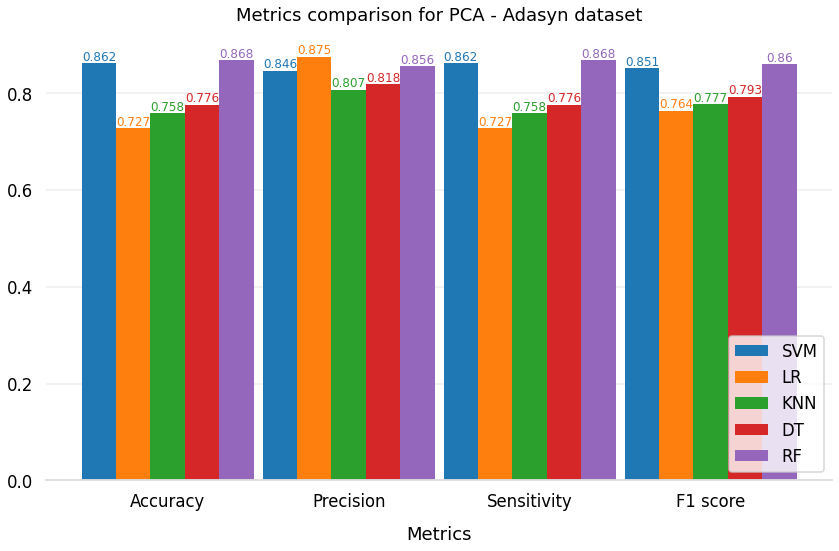

In [ ]:
# PLOT ADASYN
# dataset
SVM = df_pca_plot.loc['adasyn_SVM',:]
LR = df_pca_plot.loc['adasyn_LR',:]
KNN = df_pca_plot.loc['adasyn_KNN',:]
DT = df_pca_plot.loc['adasyn_GiniTREE',:]
RF = df_pca_plot.loc['adasyn_RandomForest',:]
plot_function(SVM, LR, KNN, DT, RF, 'PCA - Adasyn')

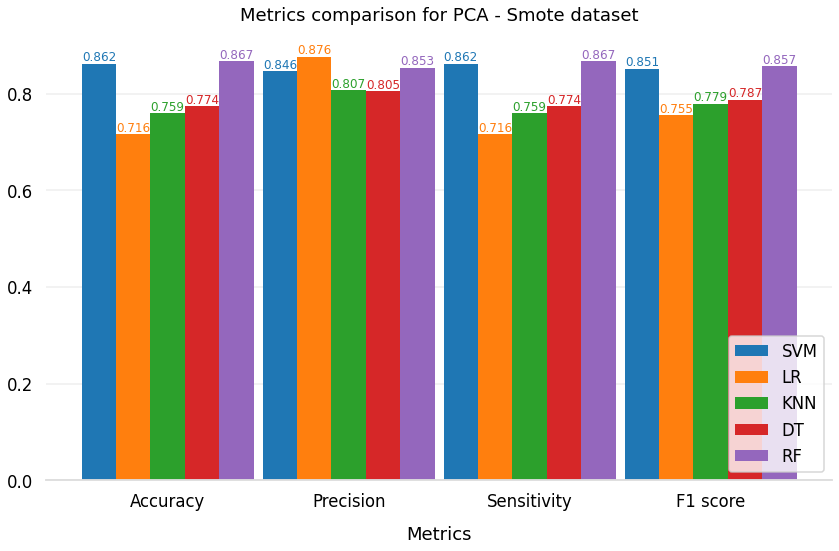

In [ ]:
# PLOT SMOTE
SVM = df_pca_plot.loc['smote_SVM',:]
LR = df_pca_plot.loc['smote_LR',:]
KNN = df_pca_plot.loc['smote_KNN',:]
DT = df_pca_plot.loc['smote_GiniTREE',:]
RF = df_pca_plot.loc['smote_RandomForest',:]
plot_function(SVM, LR, KNN, DT, RF,'PCA - Smote')

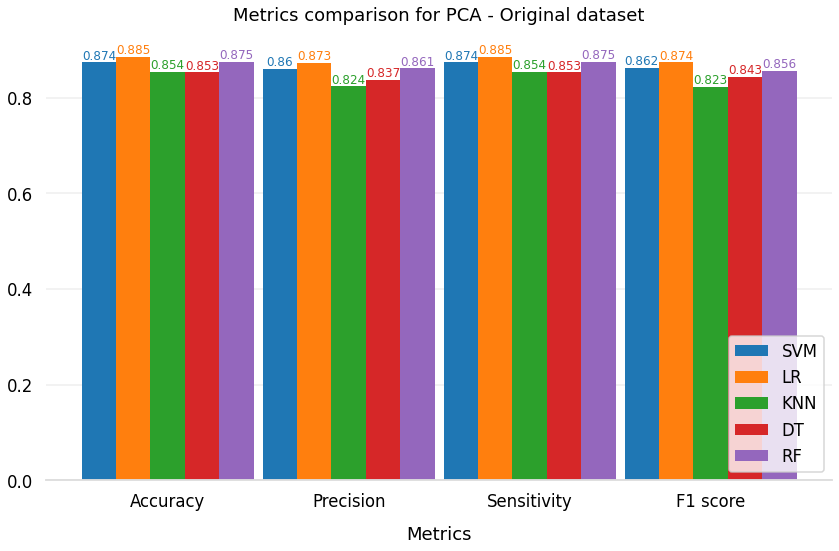

In [ ]:
# PLOT ORIGINAL
SVM = df_pca_plot.loc['original_SVM',:]
LR = df_pca_plot.loc['original_LR',:]
KNN = df_pca_plot.loc['original_KNN',:]
DT = df_pca_plot.loc['original_GiniTREE',:]
RF = df_pca_plot.loc['original_RandomForest',:]
plot_function(SVM, LR, KNN, DT, RF, 'PCA - Original')

### Feature Selection

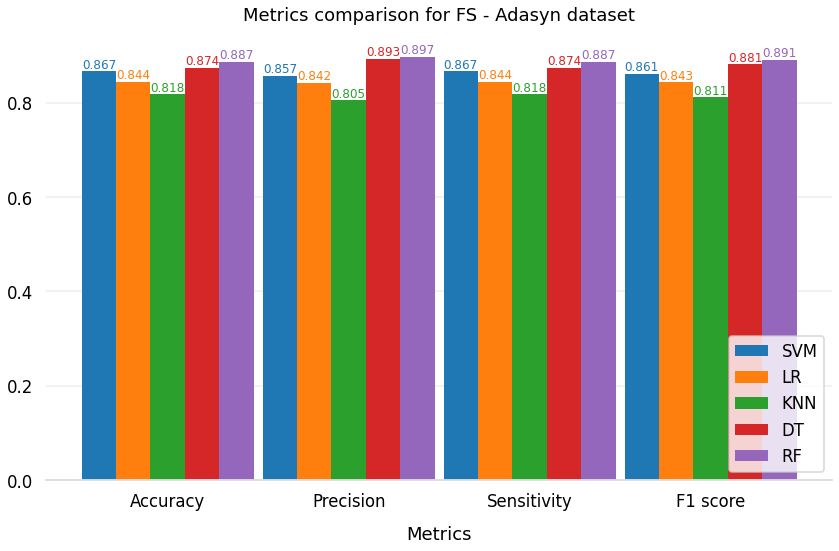

In [ ]:
# PLOT ADASYN
# dataset
SVM = df_fs_plot.loc['adasyn_SVM',:]
LR = df_fs_plot.loc['adasyn_LR',:]
KNN = df_fs_plot.loc['adasyn_KNN',:]
DT = df_fs_plot.loc['adasyn_GiniTREE',:]
RF = df_fs_plot.loc['adasyn_RandomForest',:]
plot_function(SVM, LR, KNN, DT, RF, 'FS - Adasyn')

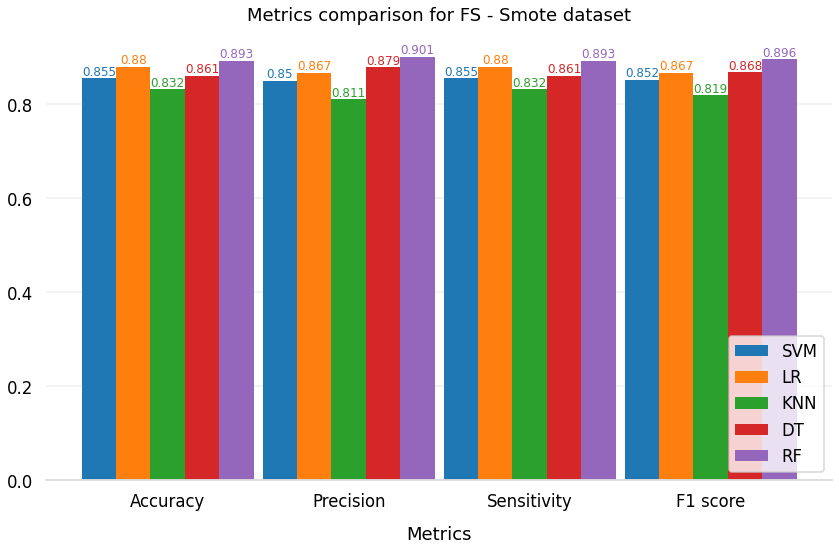

In [ ]:
# PLOT SMOTE
SVM = df_fs_plot.loc['smote_SVM',:]
LR = df_fs_plot.loc['smote_LR',:]
KNN = df_fs_plot.loc['smote_KNN',:]
DT = df_fs_plot.loc['smote_GiniTREE',:]
RF = df_fs_plot.loc['smote_RandomForest',:]
plot_function(SVM, LR, KNN, DT, RF,'FS - Smote')

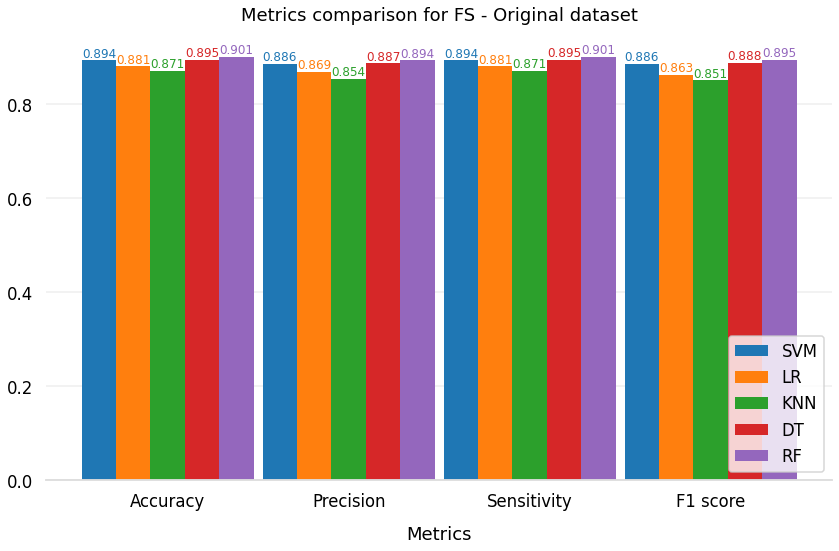

In [ ]:
# PLOT ORIGINAL
SVM = df_fs_plot.loc['original_SVM',:]
LR = df_fs_plot.loc['original_LR',:]
KNN = df_fs_plot.loc['original_KNN',:]
DT = df_fs_plot.loc['original_GiniTREE',:]
RF = df_fs_plot.loc['original_RandomForest',:]
plot_function(SVM, LR, KNN, DT, RF, 'FS - Original')

## ORIGINAL

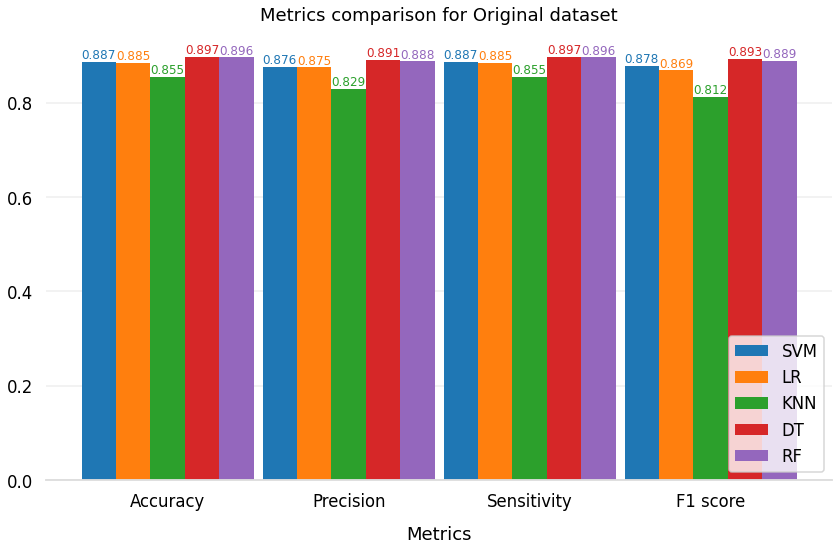

In [ ]:
# PLOT ORIGINAL
SVM = df_orig_plot.loc['orig_SVM',:]
LR = df_orig_plot.loc['orig_LR',:]
KNN = df_orig_plot.loc['orig_KNN',:]
DT = df_orig_plot.loc['orig_GiniTREE',:]
RF = df_orig_plot.loc['orig_RandomForest',:]
plot_function(SVM, LR, KNN, DT, RF, 'Original')